# Matplotlib & Seaborn - Boxplots

---

## Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as plt_patches
import matplotlib.patheffects as plt_eff
import seaborn as sns

---

## Datasets

In [3]:
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

---

# Basic Boxplots

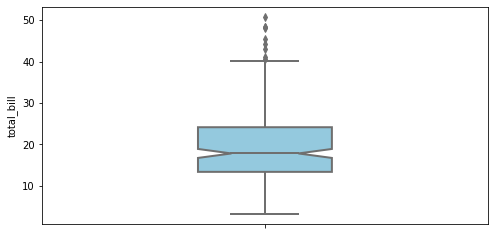

In [4]:
fig, ax = plt.subplots(figsize = (8, 4))

# Il "notch" è un CI costruito rispetto alla mediana (mediana +/- 1.57 x IQR/sqrt(n)). 

sns.boxplot(data = tips, y = "total_bill",
            linewidth = 2, notch = True, width = 0.3, color = "skyblue")

plt.show()

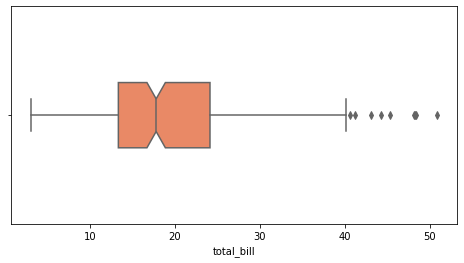

In [6]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = tips, x = "total_bill",
            notch = True, width = 0.3, color = "coral")

plt.show()

---

# Double Boxplot

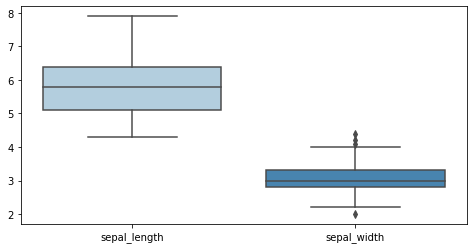

In [7]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = iris[["sepal_length", "sepal_width"]],
            palette = "Blues")

plt.show()

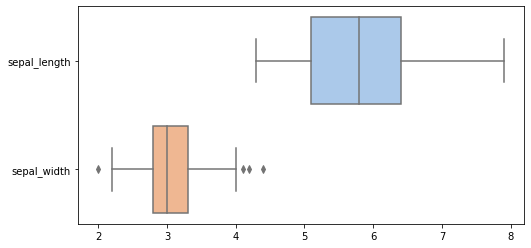

In [8]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = iris[["sepal_length", "sepal_width"]],
            orient = "h", palette = "pastel")

plt.show()

---

# Grouped Boxplot

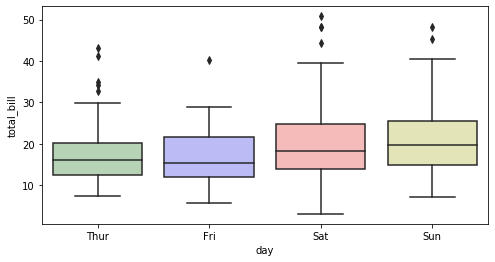

In [9]:
fig, ax = plt.subplots(figsize = (8, 4))

custom_palette = {"Thur": "g", "Fri": "b", "Sat": "r", "Sun": "y"}

sns.boxplot(data = tips,
            x = "day",
            y = "total_bill",
            palette = custom_palette,
            ax = ax)

# Trasparenza! (Da salvare)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, 0.3))

plt.show()

---

# Grouped Boxplot with Highlight

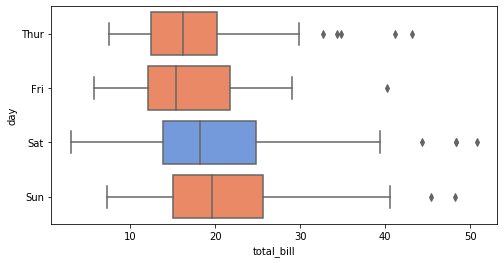

In [10]:
fig, ax = plt.subplots(figsize = (8, 4))

custom_palette = {day: "cornflowerblue" if day == "Sat" else "coral"
                  for day in tips.day.unique()}

sns.boxplot(data = tips,
            y = "day",
            x = "total_bill",
            palette = custom_palette)

plt.show()

---

# Double Grouped Boxplot

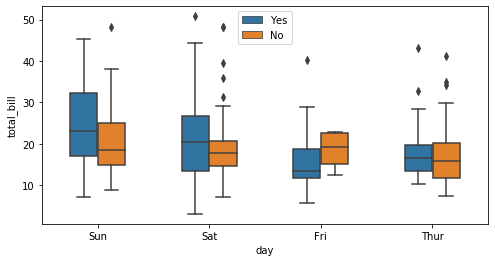

In [55]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = tips,
            x = "day",
            y = "total_bill",
            hue = "smoker",
            width = 0.5,
            order = ["Sun", "Sat", "Fri", "Thur"])

plt.legend(loc = 9)
plt.show()

---

# Custom Order Boxplot

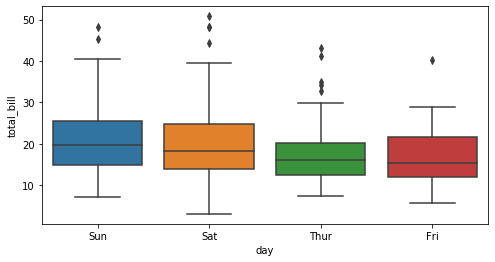

In [11]:
fig, ax = plt.subplots(figsize = (8, 4))

ordered_days = list(tips.groupby("day")["total_bill"].aggregate(np.median)\
                        .sort_values(ascending=False).index)

sns.boxplot(data = tips,
            x = "day",
            y = "total_bill",
            order = ordered_days)

plt.show()

---

# Boxplot with Jitter

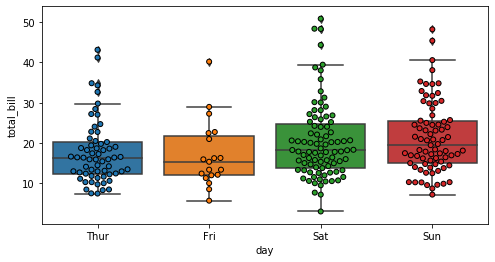

In [12]:
fig, ax = plt.subplots(figsize = (8, 4))

sns.boxplot(data = tips,
            x = "day",
            y = "total_bill")

sns.swarmplot(data = tips,
              x = "day",
              y = "total_bill",
              edgecolor = "k",
              linewidth = 1)

plt.show()

---

# Boxplot with annotations

In [13]:
bill_medians_per_day = tips.groupby("day")["total_bill"]\
                           .aggregate(np.median).reset_index()\
                           .rename(columns = {"total_bill": "median_bill"})

obs_per_day = tips.day.value_counts().reset_index()\
                  .rename(columns = {"day": "n", "index": "day"}, inplace = False)

info = bill_medians_per_day.merge(obs_per_day, on = "day", how = "inner")
info

,day,median_bill,n
0,Thur,16.20,62
1,Fri,15.38,19
2,Sat,18.24,87
3,Sun,19.63,76


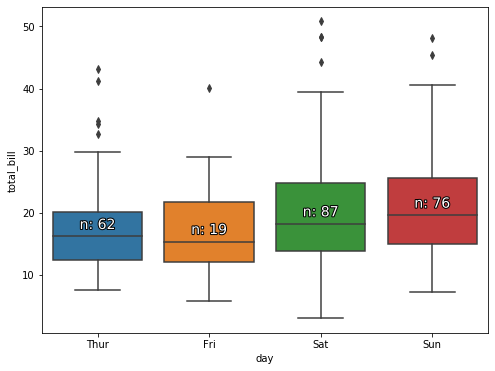

In [14]:
fig, ax = plt.subplots(figsize = (8, 6))

sns.boxplot(data = tips,
            x = "day",
            y = "total_bill",
            ax = ax)

for tick, day in enumerate(info.day.values):
    day_info = info[info.day == day]
    txt = ax.text(x = tick,
                  y = day_info.median_bill.values[0] + 1.2,
                  s = f"n: {day_info.n.values[0]}",
                  horizontalalignment = "center", size = "small",
                  color = "w", fontsize = 14)
    txt.set_path_effects([plt_eff.withStroke(linewidth = 2, foreground = "k")])
                          
plt.show()

---